# 2017 장애인 실태조사 뇌병변장애 건강관리 운동 탐색

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 원본 데이터 불러오기
raw_df = pd.read_excel('pydata/2017 장애인실태조사_뇌병변장애.xlsx', sheet_name = 1)
len(raw_df)

# 뇌병변 중 뇌졸중과 뇌손상 불러오기
df = raw_df[(raw_df['주된 진단명(1)']==2) | (raw_df['주된 진단명(1)']==3)]
df.head()

,조사표 종류,가구원 일련번호(장애인),가구원 일련번호(응답자),조사지역(시도),응답자 유형,대리응답이유,장애유형확인1,장애유형확인2,장애유형확인3,개인번호,...,"보육,교육비","보호,간병비",재활기관이용료,통신비,"장애인보조기기 구입,유지비",부모사후 및 노후대비비,기타.4,월평균 총 추가비용,wg_p,ws_p
13,2,2,2,21,NaN,NaN,2,NaN,NaN,2,...,0,0,0,0,0,0,0,110,461.979521,1.176911
15,2,2,1,21,3.0,1.0,2,5.0,NaN,2,...,0,0,0,0,0,0,0,8,493.318225,1.256747
42,2,1,1,21,NaN,NaN,2,NaN,NaN,1,...,0,0,0,0,0,0,0,20,761.982341,1.671569
85,2,1,1,21,NaN,NaN,2,NaN,NaN,1,...,0,0,0,0,10,0,90,240,493.214478,1.081970
118,2,1,88,21,8.0,1.0,2,NaN,NaN,1,...,0,500,0,0,0,0,0,578,493.214478,1.081970


## 최근 1년 동안 건강관리를 위한 운동한 경험
### 뇌졸중(뇌경색, 뇌출혈)
#### **운동 여부**

In [10]:
df.loc[df['주된 진단명(1)'] == 2][['건강관리운동']].value_counts()

건강관리운동
1         260
2         216
dtype: int64

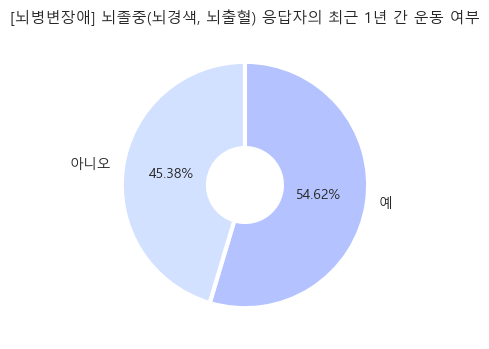

In [241]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(6, 6)

ratios = [260, 216]
labels=['예', '아니오']
colors = ['#b4c3ff', '#d2e1ff', '#e8f5ff']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}

plt.pie(ratios, labels = labels, colors=colors, startangle = 90, counterclock=False, wedgeprops=wedgeprops, autopct='%0.2f%%')
ax.set_title('[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 최근 1년 간 운동 여부', size=11)

# plt.savefig("pyvisual/뇌병변장애/뇌졸중/[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 최근 1년 간 운동 여부.png", dpi=300)
plt.show()

#### **운동주기**

In [59]:
df.loc[df['주된 진단명(1)'] == 2].loc[df['건강관리운동']==1][['운동 주기']].value_counts()

운동 주기
1        190
2         42
3         15
4          8
6          3
5          2
dtype: int64

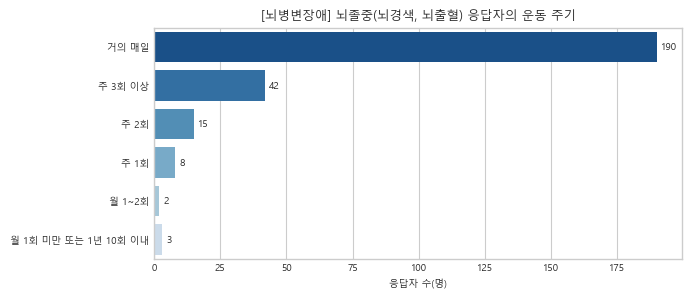

In [236]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(8, 3)

palette = sns.color_palette("Blues", n_colors=7) 
palette.reverse()

splot = sns.countplot(data=df.loc[df['주된 진단명(1)'] == 2].loc[df['건강관리운동']==1][['운동 주기']], y='운동 주기', palette=palette)

for p in splot.patches:
    ax.annotate("{:,}".format(int(p.get_width())), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(3, 0), textcoords='offset points', ha="left", va="center", size = 7)

plt.yticks([0,1,2,3,4,5], ['거의 매일', '주 3회 이상', '주 2회', '주 1회', '월 1~2회', '월 1회 미만 또는 1년 10회 이내'])
plt.ylabel('')
plt.xlabel('응답자 수(명)', size = 7)
plt.xticks(size = 7)
plt.yticks(size = 7)
plt.title('[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 운동 주기', size=9)
plt.gcf().subplots_adjust(left=0.24)

# plt.savefig("pyvisual/뇌병변장애/뇌졸중/[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 운동 주기.png", dpi=300)
plt.show()

#### **운동 시간(분)**

In [86]:
df.loc[df['주된 진단명(1)'] == 2].loc[df['건강관리운동']==1][['운동 시간(분)']].describe()

,운동 시간(분)
count,260.000000
mean,51.538462
std,37.278800
min,5.000000
25%,30.000000
50%,40.000000
75%,60.000000
max,240.000000


In [94]:
df.loc[df['주된 진단명(1)'] == 2].loc[df['건강관리운동']==1][['운동 시간(분)']].value_counts()

운동 시간(분)
30          89
60          69
40          24
20          23
120         21
10          11
90           9
180          5
50           3
240          2
5            1
45           1
70           1
80           1
dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


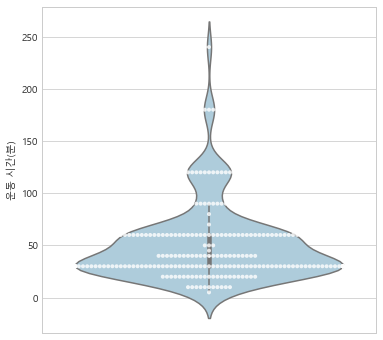

In [30]:
# plt.figure(figsize=(6, 6))

# sns.violinplot(data = df.loc[df['주된 진단명(1)'] == 2].loc[df['건강관리운동']==1][['운동 시간(분)']],
#               y='운동 시간(분)', palette='Paired')
# sns.swarmplot(data = df.loc[df['주된 진단명(1)'] == 2].loc[df['건강관리운동']==1][['운동 시간(분)']],
#               y='운동 시간(분)', color="white", alpha=0.8, size=4)
# plt.title()
# plt.show()

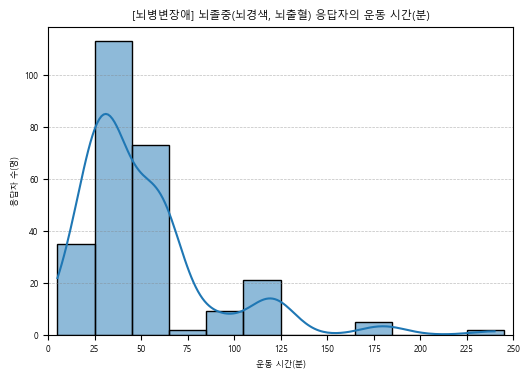

In [145]:
plt.figure(figsize=(6, 4))
plt.style.use('default')
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

sns.histplot(data = df.loc[df['주된 진단명(1)'] == 2].loc[df['건강관리운동']==1][['운동 시간(분)']],binwidth= 20, kde=True,
              x='운동 시간(분)', palette='Paired')
plt.ylabel('응답자 수(명)', size = 6)
plt.xticks(np.arange(0, 260, 25)) # x축 눈금 설정
plt.xlabel('운동 시간(분)', size=6)
plt.xlim([0, 250])
plt.xticks(size = 6)
plt.yticks(size = 6)
plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='--', linewidth=0.5)
plt.title('[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 운동 시간(분)', size = 8)

# plt.savefig("pyvisual/뇌병변장애/뇌졸중/[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 운동 시간(분).png", dpi=300)
plt.show()

#### **운동장소**

In [111]:
place_df = df.loc[df['주된 진단명(1)'] == 2].loc[df['건강관리운동']==1][['운동 장소 (1순위)', '운동 장소 (2순위)']]
place_df.head()

,운동 장소 (1순위),운동 장소 (2순위)
13,2,1
42,6,0
85,1,0
118,2,1
133,2,0


In [206]:
place_df1 = pd.DataFrame(place_df[['운동 장소 (1순위)']].value_counts()).reset_index()

new_place = []
place_list = ['집안', '근처 야외 등산로나 공원', '복지관 체육시설', '상업 스포츠 시설', '근처 학교 운동장', '공공체육시설(학교 포함)', '장애인 전용 체육센터','기타']
for i in range(len(place_df1)):
    place_df1.replace({'운동 장소 (1순위)': i+1}, {'운동 장소 (1순위)': place_list[i]}, inplace=True)
place_df1

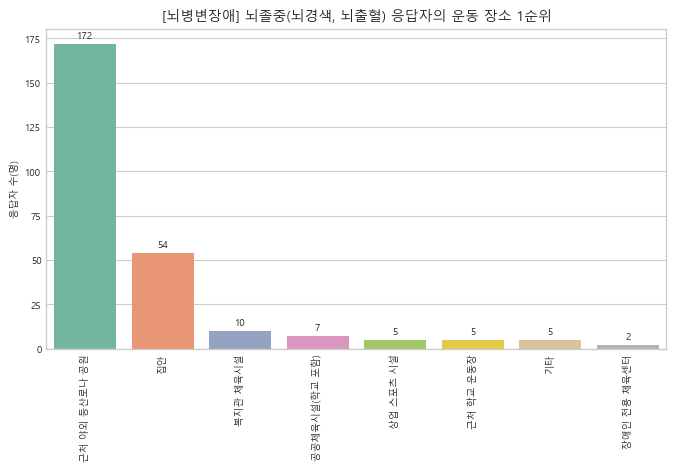

In [215]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 5)
plt.style.use('seaborn-whitegrid')
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

order_list = place_df1['운동 장소 (1순위)'].tolist()

palette = sns.color_palette("Blues", n_colors=8) 
palette.reverse()

splot = sns.barplot(data=place_df1, 
                    x='운동 장소 (1순위)', y = 0, order = order_list, palette='Set2')

for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=7, xytext=(0, 6),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('응답자 수(명)', size = 7)
plt.xticks(size = 7, rotation=90)
plt.yticks(size = 7)
plt.title('[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 운동 장소 1순위', size=10)
plt.gcf().subplots_adjust(bottom=0.24)

# plt.savefig("pyvisual/뇌병변장애/뇌졸중/[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 운동 장소 1순위.png", dpi=300)
plt.show()

In [230]:
place_df2 = pd.DataFrame(place_df[['운동 장소 (2순위)']].value_counts()).reset_index()

# new_place = []
place_list = ['비해당', '집안', '근처 야외 등산로나 공원', '복지관 체육시설', '상업 스포츠 시설', '근처 학교 운동장', '공공체육시설(학교 포함)', '장애인 전용 체육센터','기타']
for i in range(len(place_df2)):
    place_df2.replace({'운동 장소 (2순위)': i}, {'운동 장소 (2순위)': place_list[i]}, inplace=True)
place_df2

,운동 장소 (2순위),0
0,비해당,177
1,집안,40
2,근처 야외 등산로나 공원,26
3,근처 학교 운동장,11
4,복지관 체육시설,2
5,공공체육시설(학교 포함),2
6,상업 스포츠 시설,1
7,장애인 전용 체육센터,1


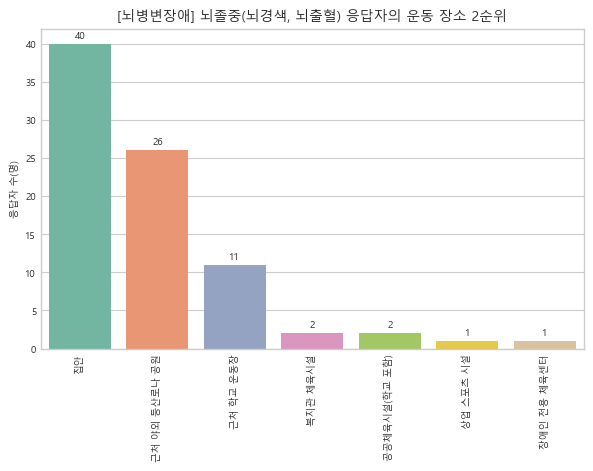

In [235]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(7, 5)
plt.style.use('seaborn-whitegrid')
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

order_list2 = place_df2['운동 장소 (2순위)'].tolist()

palette = sns.color_palette("Blues", n_colors=8) 
palette.reverse()

splot = sns.barplot(data=place_df2.loc[1:, :], 
                    x='운동 장소 (2순위)', y = 0, order = order_list2[1:], palette='Set2')

for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=7, xytext=(0, 6),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('응답자 수(명)', size = 7)
plt.xticks(size = 7, rotation=90)
plt.yticks(size = 7)
plt.title('[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 운동 장소 2순위', size=10)
plt.gcf().subplots_adjust(bottom=0.24)

# plt.savefig("pyvisual/뇌병변장애/뇌졸중/[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 운동 장소 2순위.png", dpi=300)
plt.show()

In [113]:
group_df = place_df.groupby(['운동 장소 (1순위)', '운동 장소 (2순위)'])[['운동 장소 (1순위)']].count().add_suffix('_Count').reset_index()
group_df.head()

,운동 장소 (1순위),운동 장소 (2순위),운동 장소 (1순위)_Count
0,1,0,32
1,1,2,20
2,1,5,2
3,2,0,122
4,2,1,35


In [115]:
pivot_df = group_df.pivot('운동 장소 (2순위)', '운동 장소 (1순위)', '운동 장소 (1순위)_Count')
pivot_df.fillna(0, inplace=True)
# pivot_df.astype('int')
pivot_df

운동 장소 (1순위),1,2,3,4,5,6,7,8
운동 장소 (2순위),,,,,,,,
0,32.0,122.0,7.0,4.0,2.0,6.0,0.0,4.0
1,0.0,35.0,1.0,0.0,2.0,1.0,1.0,0.0
2,20.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0
3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


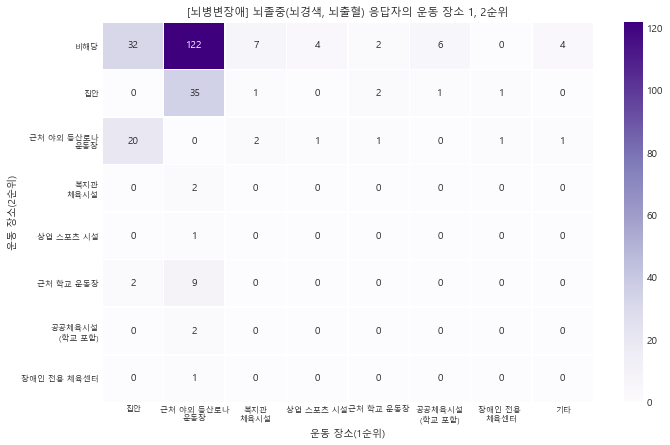

In [211]:
x_axis_labels = ['집안', '근처 야외 등산로나\n운동장', '복지관\n체육시설', '상업 스포츠 시설', '근처 학교 운동장', 
                 '공공체육시설\n(학교 포함)', '장애인 전용 \n체육센터', '기타'] # 1순위
y_axis_labels = ['비해당', '집안', '근처 야외 등산로나\n운동장', '복지관\n체육시설', '상업 스포츠 시설', '근처 학교 운동장', 
                 '공공체육시설\n(학교 포함)', '장애인 전용 체육센터'] # 2순위

fig, ax = plt.subplots()
fig.set_size_inches(11, 7)

sns.heatmap(pivot_df, cbar=True, cmap='Purples', linewidths=0.5, annot=True, annot_kws={"size": 10},
           xticklabels = x_axis_labels, yticklabels=y_axis_labels, fmt = 'g')
ax.set_title('[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 운동 장소 1, 2순위', size = 11)
ax.tick_params(axis = 'y', labelsize =8, labelrotation = 0)
ax.tick_params(axis = 'x', labelsize =8, labelrotation = 0)
ax.set_xlabel('운동 장소(1순위)', size = 10)
ax.set_ylabel('운동 장소(2순위)', size = 10)

# plt.savefig("pyvisual/뇌병변장애/뇌졸중/[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 운동 장소 1, 2순위.png", dpi=300)
plt.show()

#### **참여 운동 종목**

In [229]:
kinds_df1 = df.loc[df['주된 진단명(1)'] == 2].loc[df['건강관리운동']==1][['참여 운동 종목 (1순위)', '참여 운동 종목 (2순위)']]
kinds_df1.head()
# kinds_df1[['참여 운동 종목 (2순위)']].value_counts()

,참여 운동 종목 (1순위),참여 운동 종목 (2순위)
13,2,6
42,6,0
85,3,2
118,2,3
133,2,3


In [204]:
# kinds_list1 = ['호흡운동', '걷기/조깅', '맨손체조/스트레칭', '균형잡기 운동', '수중운동', '자전거', '웨이트 트레이닝', '등산',
#              '수영', '요가', '보치아', '배드민턴', '게이트볼', '탁구', '볼링', '당구', '(파크)골프', '기타']
# kinds_list2 = ['비해당', '호흡운동', '걷기/조깅', '맨손체조/스트레칭', '균형잡기 운동', '수중운동', '자전거', '웨이트 트레이닝', '등산',
#              '수영', '요가', '보치아', '배드민턴', '게이트볼', '탁구', '볼링', '당구', '(파크)골프', '기타']

# ## 1순위
# for i in range(len(kinds_list1)):
#     kinds_df1.replace({'참여 운동 종목 (1순위)': i+1}, {'참여 운동 종목 (1순위)': kinds_list1[i]}, inplace=True)

# ## 2순위
# for j in range(len(kinds_list2)):
#     kinds_df1.replace({'참여 운동 종목 (2순위)': j}, {'참여 운동 종목 (2순위)': kinds_list2[j]}, inplace=True)

# kinds_df1.head()

,참여 운동 종목 (1순위),참여 운동 종목 (2순위)
13,걷기/조깅,자전거
42,자전거,비해당
85,맨손체조/스트레칭,걷기/조깅
118,걷기/조깅,맨손체조/스트레칭
133,걷기/조깅,맨손체조/스트레칭


In [230]:
kinds_group_df1 = kinds_df1.groupby(['참여 운동 종목 (1순위)', '참여 운동 종목 (2순위)'])[['참여 운동 종목 (1순위)']].count().add_suffix('_Count').reset_index()
kinds_group_df1.head()

,참여 운동 종목 (1순위),참여 운동 종목 (2순위),참여 운동 종목 (1순위)_Count
0,1,2,2
1,1,7,1
2,2,0,130
3,2,1,5
4,2,3,44


In [231]:
move_pivot_df1 = kinds_group_df1.pivot('참여 운동 종목 (2순위)', '참여 운동 종목 (1순위)', '참여 운동 종목 (1순위)_Count').fillna(0)
# move_pivot_df1.fillna(0, inplace=True)
# pivot_df.astype('int')
move_pivot_df1

참여 운동 종목 (1순위),1,2,3,4,5,6,7,8,9,10,13,15,18
참여 운동 종목 (2순위),,,,,,,,,,,,,
0,0.0,130.0,12.0,2.0,0.0,10.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0
1,0.0,5.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,8.0,2.0,0.0,6.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0
3,0.0,44.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


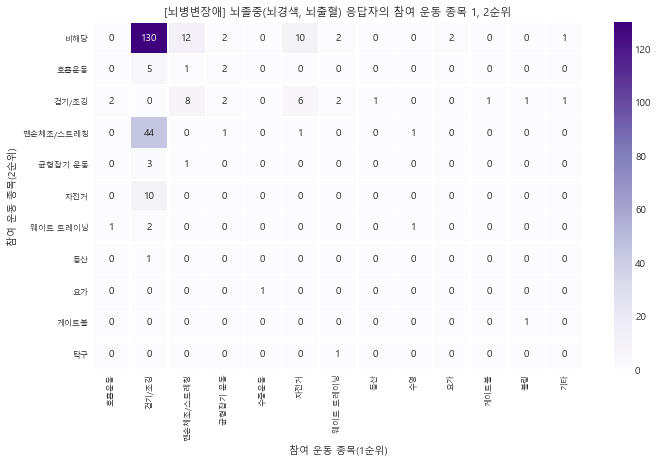

In [236]:
x_axis_labels = ['호흡운동', '걷기/조깅', '맨손체조/스트레칭', '균형잡기 운동', '수중운동', '자전거', '웨이트 트레이닝', '등산',
             '수영', '요가', '게이트볼', '볼링', '기타'] # 1순위
y_axis_labels = ['비해당', '호흡운동', '걷기/조깅', '맨손체조/스트레칭', '균형잡기 운동', '자전거', '웨이트 트레이닝', '등산',
            '요가', '게이트볼', '탁구'] # 2순위

fig, ax = plt.subplots()
fig.set_size_inches(11, 7)

sns.heatmap(move_pivot_df1, cbar=True, cmap='Purples', linewidths=0.5, annot=True, annot_kws={"size": 10}, 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels, fmt = 'g')
ax.set_title('[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 참여 운동 종목 1, 2순위', size = 11)
ax.tick_params(axis = 'y', labelsize =8, labelrotation = 0)
ax.tick_params(axis = 'x', labelsize =8, labelrotation = 90)
ax.set_xlabel('참여 운동 종목(1순위)', size = 10)
ax.set_ylabel('참여 운동 종목(2순위)', size = 10)

plt.gcf().subplots_adjust(bottom=0.19)
# plt.savefig("pyvisual/뇌병변장애/뇌졸중/[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 참여 운동 종목 1, 2순위.png", dpi=300)
plt.show()

### 뇌손상
#### **운동 여부**

In [237]:
df.loc[df['주된 진단명(1)'] == 3][['건강관리운동']].value_counts()

건강관리운동
2         43
1         35
dtype: int64

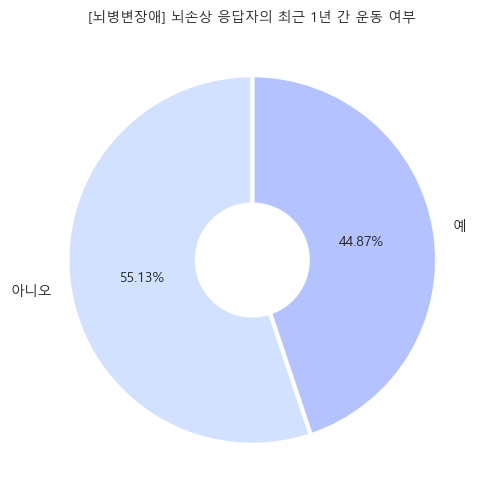

In [244]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(6, 6)

ratios = [35, 43]
labels=['예', '아니오']
colors = ['#b4c3ff', '#d2e1ff', '#e8f5ff']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}

plt.pie(ratios, labels = labels, colors=colors, startangle = 90, counterclock=False, wedgeprops=wedgeprops, autopct='%0.2f%%')
ax.set_title('[뇌병변장애] 뇌손상 응답자의 최근 1년 간 운동 여부', size=10)

# plt.savefig("pyvisual/뇌병변장애/뇌손상/[뇌병변장애] 뇌손상 응답자의 최근 1년 간 운동 여부.png", dpi=300)
plt.show()

#### **운동 주기**

In [245]:
df.loc[df['주된 진단명(1)'] == 3].loc[df['건강관리운동']==1][['운동 주기']].value_counts()

운동 주기
1        20
2         9
3         4
4         1
6         1
dtype: int64

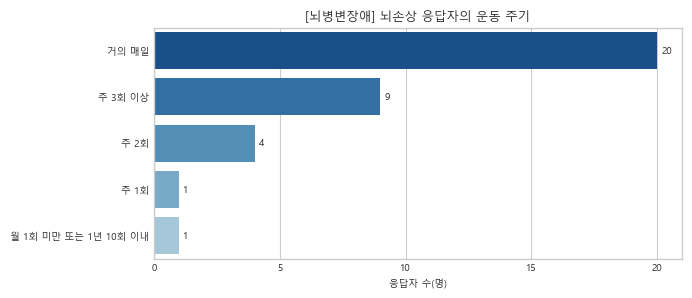

In [252]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(8, 3)

palette = sns.color_palette("Blues", n_colors=7) 
palette.reverse()

splot = sns.countplot(data=df.loc[df['주된 진단명(1)'] == 3].loc[df['건강관리운동']==1][['운동 주기']], y='운동 주기', palette=palette)

for p in splot.patches:
    ax.annotate("{:,}".format(int(p.get_width())), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(3, 0), textcoords='offset points', ha="left", va="center", size = 7)

plt.yticks([0,1,2,3,4], ['거의 매일', '주 3회 이상', '주 2회', '주 1회', '월 1회 미만 또는 1년 10회 이내'])
plt.ylabel('')
plt.xticks(np.arange(0, 25, 5)) # x축 눈금 설정
plt.xlabel('응답자 수(명)', size = 7)
plt.xticks(size = 7)
plt.yticks(size = 7)
plt.title('[뇌병변장애] 뇌손상 응답자의 운동 주기', size=9)
plt.gcf().subplots_adjust(left=0.24)

# plt.savefig("pyvisual/뇌병변장애/뇌손상/[뇌병변장애] 뇌손상 응답자의 운동 주기.png", dpi=300)
plt.show()

#### **운동 시간(분)**

In [253]:
df.loc[df['주된 진단명(1)'] == 3].loc[df['건강관리운동']==1][['운동 시간(분)']].describe()

,운동 시간(분)
count,35.000000
mean,62.714286
std,70.140016
min,20.000000
25%,30.000000
50%,40.000000
75%,60.000000
max,420.000000


In [254]:
df.loc[df['주된 진단명(1)'] == 3].loc[df['건강관리운동']==1][['운동 시간(분)']].value_counts()

운동 시간(분)
30          12
60           8
120          5
20           4
50           2
25           1
40           1
90           1
420          1
dtype: int64

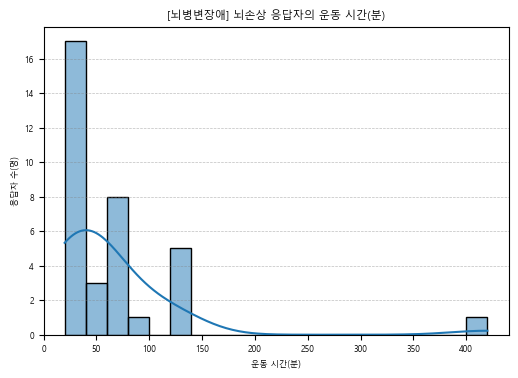

In [258]:
plt.figure(figsize=(6, 4))
plt.style.use('default')
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

sns.histplot(data = df.loc[df['주된 진단명(1)'] == 3].loc[df['건강관리운동']==1][['운동 시간(분)']],binwidth= 20, kde=True,
              x='운동 시간(분)', palette='Paired')
plt.ylabel('응답자 수(명)', size = 6)
# plt.xticks(np.arange(0, 260, 25)) # x축 눈금 설정
plt.xlabel('운동 시간(분)', size=6)
# plt.xlim([0, 250])
plt.xticks(size = 6)
plt.yticks(size = 6)
plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='--', linewidth=0.5)
plt.title('[뇌병변장애] 뇌손상 응답자의 운동 시간(분)', size = 8)

# plt.savefig("pyvisual/뇌병변장애/뇌손상/[뇌병변장애] 뇌손상 응답자의 운동 시간(분).png", dpi=300)
plt.show()

#### **운동 장소**

In [237]:
place_df = df.loc[df['주된 진단명(1)'] == 3].loc[df['건강관리운동']==1][['운동 장소 (1순위)', '운동 장소 (2순위)']]
place_df.head()

,운동 장소 (1순위),운동 장소 (2순위)
335,1,0
887,2,1
922,2,1
1201,2,0
1687,3,2


In [11]:
place_df1 = pd.DataFrame(place_df[['운동 장소 (1순위)']].value_counts()).reset_index()

place_df1.replace({'운동 장소 (1순위)': 1}, {'운동 장소 (1순위)': '집안'}, inplace=True)
place_df1.replace({'운동 장소 (1순위)': 2}, {'운동 장소 (1순위)': '근처 야외 등산로나 공원'}, inplace=True)
place_df1.replace({'운동 장소 (1순위)': 3}, {'운동 장소 (1순위)': '복지관 체육시설'}, inplace=True)
place_df1.replace({'운동 장소 (1순위)': 4}, {'운동 장소 (1순위)': '상업 스포츠 시설'}, inplace=True)
place_df1.replace({'운동 장소 (1순위)': 6}, {'운동 장소 (1순위)': '공공체육시설(학교 포함)'}, inplace=True)

place_df1

,운동 장소 (1순위),0
0,근처 야외 등산로나 공원,23
1,집안,6
2,복지관 체육시설,3
3,상업 스포츠 시설,2
4,공공체육시설(학교 포함),1


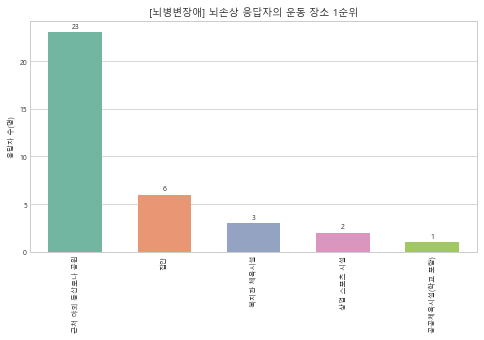

In [16]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 5)
plt.style.use('seaborn-whitegrid')
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

order_list = place_df1['운동 장소 (1순위)'].tolist()

palette = sns.color_palette("Blues", n_colors=5) 
palette.reverse()

splot = sns.barplot(data=place_df1, 
                    x='운동 장소 (1순위)', y = 0, order = order_list, palette='Set2')

for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=7, xytext=(0, 6),
                   textcoords='offset points')

# seaborn 막대 그래프 너비 설정
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
change_width(ax, .6)    
    
plt.xlabel('')
plt.ylabel('응답자 수(명)', size = 7)
plt.xticks(size = 7, rotation=90)
plt.yticks(size = 7)
plt.title('[뇌병변장애] 뇌손상 응답자의 운동 장소 1순위', size=10)
plt.gcf().subplots_adjust(bottom=0.24)

plt.savefig("pyvisual/뇌병변장애/뇌손상/[뇌병변장애] 뇌손상 응답자의 운동 장소 1순위.png", dpi=300)
plt.show()

In [18]:
place_df2 = pd.DataFrame(place_df[['운동 장소 (2순위)']].value_counts()).reset_index()

place_df2.replace({'운동 장소 (2순위)': 0}, {'운동 장소 (2순위)': '비해당'}, inplace=True)
place_df2.replace({'운동 장소 (2순위)': 1}, {'운동 장소 (2순위)': '집안'}, inplace=True)
place_df2.replace({'운동 장소 (2순위)': 2}, {'운동 장소 (2순위)': '근처 야외 등산로나 공원'}, inplace=True)
place_df2.replace({'운동 장소 (2순위)': 5}, {'운동 장소 (2순위)': '근처 학교 운동장'}, inplace=True)

place_df2

,운동 장소 (2순위),0
0,비해당,22
1,집안,8
2,근처 학교 운동장,3
3,근처 야외 등산로나 공원,2


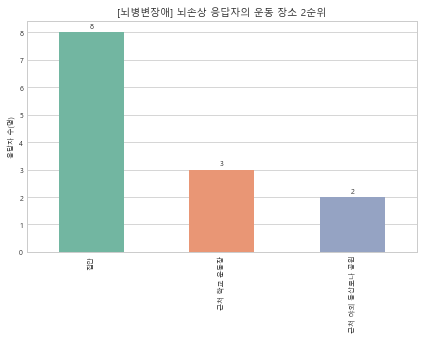

In [22]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(7, 5)
plt.style.use('seaborn-whitegrid')
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

order_list2 = place_df2['운동 장소 (2순위)'].tolist()

palette = sns.color_palette("Blues", n_colors=8) 
palette.reverse()

splot = sns.barplot(data=place_df2.loc[1:, :], 
                    x='운동 장소 (2순위)', y = 0, order = order_list2[1:], palette='Set2')

for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=7, xytext=(0, 6),
                   textcoords='offset points')

# seaborn 막대 그래프 너비 설정
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
change_width(ax, .5)
    
plt.xlabel('')
plt.ylabel('응답자 수(명)', size = 7)
plt.xticks(size = 7, rotation=90)
plt.yticks(size = 7)
plt.title('[뇌병변장애] 뇌손상 응답자의 운동 장소 2순위', size=10)
plt.gcf().subplots_adjust(bottom=0.24)

plt.savefig("pyvisual/뇌병변장애/뇌손상/[뇌병변장애] 뇌손상 응답자의 운동 장소 2순위.png", dpi=300)
plt.show()

In [238]:
group_df2 = place_df.groupby(['운동 장소 (1순위)', '운동 장소 (2순위)'])[['운동 장소 (1순위)']].count().add_suffix('_Count').reset_index()
group_df2

,운동 장소 (1순위),운동 장소 (2순위),운동 장소 (1순위)_Count
0,1,0,4
1,1,2,1
2,1,5,1
3,2,0,13
4,2,1,8
5,2,5,2
6,3,0,2
7,3,2,1
8,4,0,2
9,6,0,1


In [239]:
move_pivot_df2 = group_df2.pivot('운동 장소 (2순위)', '운동 장소 (1순위)', '운동 장소 (1순위)_Count').fillna(0)
# pivot_df.astype('int')
move_pivot_df2

운동 장소 (1순위),1,2,3,4,6
운동 장소 (2순위),,,,,
0,4.0,13.0,2.0,2.0,1.0
1,0.0,8.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0
5,1.0,2.0,0.0,0.0,0.0


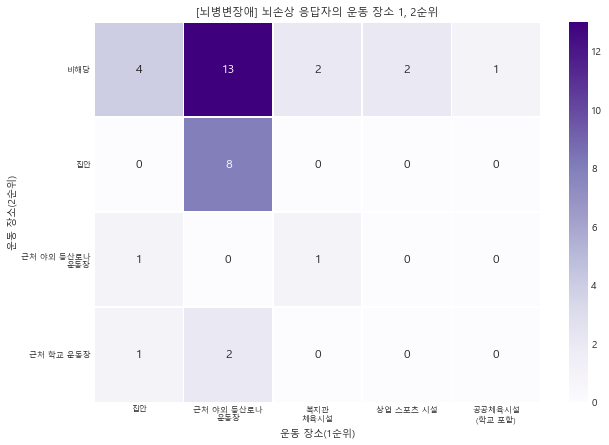

In [246]:
x_axis_labels = ['집안', '근처 야외 등산로나\n운동장', '복지관\n체육시설', '상업 스포츠 시설', '공공체육시설\n(학교 포함)'] # 1순위
y_axis_labels = ['비해당', '집안', '근처 야외 등산로나\n운동장', '근처 학교 운동장'] # 2순위

fig, ax = plt.subplots()
fig.set_size_inches(10, 7)

sns.heatmap(move_pivot_df2, cbar=True, cmap='Purples', linewidths=0.5, annot=True, annot_kws={"size": 12},
           xticklabels = x_axis_labels, yticklabels=y_axis_labels)
ax.set_title('[뇌병변장애] 뇌손상 응답자의 운동 장소 1, 2순위', size = 11)
ax.tick_params(axis = 'y', labelsize =8, labelrotation = 0)
ax.tick_params(axis = 'x', labelsize =8)
ax.set_xlabel('운동 장소(1순위)', size = 10)
ax.set_ylabel('운동 장소(2순위)', size = 10)

# plt.savefig("pyvisual/뇌병변장애/뇌손상/[뇌병변장애] 뇌손상 응답자의 운동 장소 1, 2순위.png", dpi=300)
plt.show()

#### **참여 운동 종목**

In [248]:
kinds_df2 = df.loc[df['주된 진단명(1)'] == 3].loc[df['건강관리운동']==1][['참여 운동 종목 (1순위)', '참여 운동 종목 (2순위)']]
kinds_df2.head()
# kinds_df1[['참여 운동 종목 (2순위)']].value_counts()

,참여 운동 종목 (1순위),참여 운동 종목 (2순위)
335,2,6
887,2,3
922,2,18
1201,2,0
1687,7,2


In [204]:
# kinds_list1 = ['호흡운동', '걷기/조깅', '맨손체조/스트레칭', '균형잡기 운동', '수중운동', '자전거', '웨이트 트레이닝', '등산',
#              '수영', '요가', '보치아', '배드민턴', '게이트볼', '탁구', '볼링', '당구', '(파크)골프', '기타']
# kinds_list2 = ['비해당', '호흡운동', '걷기/조깅', '맨손체조/스트레칭', '균형잡기 운동', '수중운동', '자전거', '웨이트 트레이닝', '등산',
#              '수영', '요가', '보치아', '배드민턴', '게이트볼', '탁구', '볼링', '당구', '(파크)골프', '기타']

# ## 1순위
# for i in range(len(kinds_list1)):
#     kinds_df1.replace({'참여 운동 종목 (1순위)': i+1}, {'참여 운동 종목 (1순위)': kinds_list1[i]}, inplace=True)

# ## 2순위
# for j in range(len(kinds_list2)):
#     kinds_df1.replace({'참여 운동 종목 (2순위)': j}, {'참여 운동 종목 (2순위)': kinds_list2[j]}, inplace=True)

# kinds_df1.head()

,참여 운동 종목 (1순위),참여 운동 종목 (2순위)
13,걷기/조깅,자전거
42,자전거,비해당
85,맨손체조/스트레칭,걷기/조깅
118,걷기/조깅,맨손체조/스트레칭
133,걷기/조깅,맨손체조/스트레칭


In [249]:
kinds_group_df2 = kinds_df2.groupby(['참여 운동 종목 (1순위)', '참여 운동 종목 (2순위)'])[['참여 운동 종목 (1순위)']].count().add_suffix('_Count').reset_index()
kinds_group_df2.head()

,참여 운동 종목 (1순위),참여 운동 종목 (2순위),참여 운동 종목 (1순위)_Count
0,2,0,14
1,2,1,1
2,2,3,6
3,2,6,2
4,2,18,1


In [250]:
move_pivot_df2 = kinds_group_df2.pivot('참여 운동 종목 (2순위)', '참여 운동 종목 (1순위)', '참여 운동 종목 (1순위)_Count').fillna(0)
# move_pivot_df1.fillna(0, inplace=True)
# pivot_df.astype('int')
move_pivot_df2

참여 운동 종목 (1순위),2,3,4,5,6,7,10,13
참여 운동 종목 (2순위),,,,,,,,
0,14.0,1.0,0.0,1.0,2.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
3,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


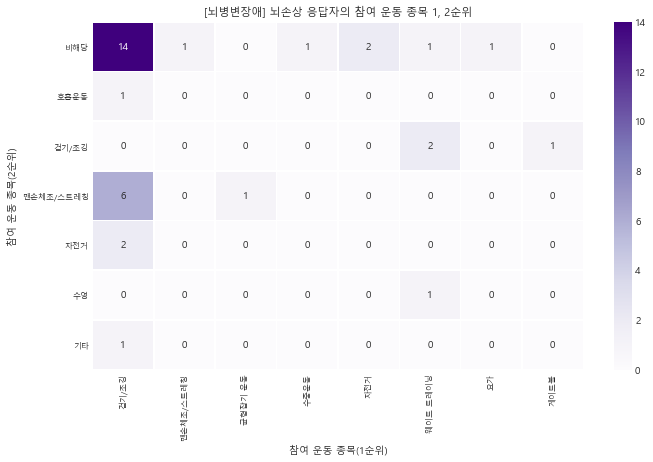

In [253]:
x_axis_labels = ['걷기/조깅', '맨손체조/스트레칭', '균형잡기 운동', '수중운동', '자전거', 
                 '웨이트 트레이닝', '요가', '게이트볼'] # 1순위
y_axis_labels = ['비해당', '호흡운동', '걷기/조깅', '맨손체조/스트레칭', '자전거', '수영', '기타'] # 2순위

fig, ax = plt.subplots()
fig.set_size_inches(11, 7)

sns.heatmap(move_pivot_df2, cbar=True, cmap='Purples', linewidths=0.5, annot=True, annot_kws={"size": 10}, 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels, fmt = 'g')
ax.set_title('[뇌병변장애] 뇌손상 응답자의 참여 운동 종목 1, 2순위', size = 11)
ax.tick_params(axis = 'y', labelsize =8, labelrotation = 0)
ax.tick_params(axis = 'x', labelsize =8, labelrotation = 90)
ax.set_xlabel('참여 운동 종목(1순위)', size = 10)
ax.set_ylabel('참여 운동 종목(2순위)', size = 10)

plt.gcf().subplots_adjust(bottom=0.19)
plt.savefig("pyvisual/뇌병변장애/뇌손상/[뇌병변장애] 뇌손상 응답자의 참여 운동 종목 1, 2순위.png", dpi=300)
plt.show()

---
## 운동하지 않는 주된 이유
### 뇌졸중(뇌경색, 뇌출혈)

In [3]:
no_move1 = pd.DataFrame(df.loc[df['주된 진단명(1)'] == 2].loc[df['건강관리운동']==2][['운동하지 않는 주된 이유']].value_counts()).reset_index()
no_move1

,운동하지 않는 주된 이유,0
0,7,136
1,10,24
2,3,21
3,2,12
4,11,5
5,9,4
6,12,4
7,14,4
8,8,2
9,1,1


In [4]:
no_reason = ['경제적 여건이 안됨', '시간 여유 없음', '시설접근 및 이동 어렵(보조인력 지원 포함)', '장애인 전문 지도자 없음', '원하는 프로그램 없음',
            '관련 정보 모름', '심한 장애', '관련 시설 주위 없음', '운동 필요 없거나 다른 활동 참여 중', '장애 상태 악화 우려', '주위 시선 불편',
            '운동에 필요한 적절한 보조기기 없음', '운동시설 등에서 받아주지 않음', '기타']

for i in range(len(no_reason)):
    no_move1.replace({'운동하지 않는 주된 이유': i+1}, {'운동하지 않는 주된 이유': no_reason[i]}, inplace=True)
no_move1

,운동하지 않는 주된 이유,0
0,심한 장애,136
1,장애 상태 악화 우려,24
2,시설접근 및 이동 어렵(보조인력 지원 포함),21
3,시간 여유 없음,12
4,주위 시선 불편,5
5,운동 필요 없거나 다른 활동 참여 중,4
6,운동에 필요한 적절한 보조기기 없음,4
7,기타,4
8,관련 시설 주위 없음,2
9,경제적 여건이 안됨,1


In [7]:
no_move1['pct'] = round(no_move1[0] / no_move1[0].sum() *100, 2)
no_move1

,운동하지 않는 주된 이유,0,pct
0,심한 장애,136,62.96
1,장애 상태 악화 우려,24,11.11
2,시설접근 및 이동 어렵(보조인력 지원 포함),21,9.72
3,시간 여유 없음,12,5.56
4,주위 시선 불편,5,2.31
5,운동 필요 없거나 다른 활동 참여 중,4,1.85
6,운동에 필요한 적절한 보조기기 없음,4,1.85
7,기타,4,1.85
8,관련 시설 주위 없음,2,0.93
9,경제적 여건이 안됨,1,0.46


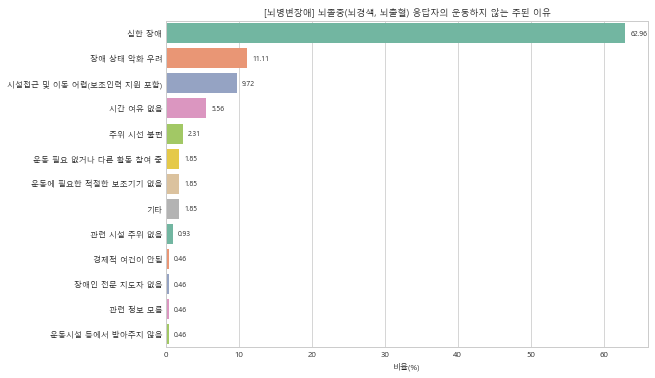

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

splot = sns.barplot(data = no_move1, y='운동하지 않는 주된 이유', x='pct', palette='Set2')

ax.set_title('[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 운동하지 않는 주된 이유', size = 9)
ax.set_xlabel('비율(%)', size = 8)
ax.set_ylabel('')
ax.tick_params(axis = 'both', labelsize =8, labelrotation = 0)

### 비율(%) 라벨링 하기
for p in splot.patches:
    ax.annotate("%.2f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", size = 7)

plt.gcf().subplots_adjust(left=0.23)
# plt.savefig("pyvisual/뇌병변장애/뇌졸중/[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 운동하지 않는 주된 이유(pct).png", dpi=300)
plt.show()

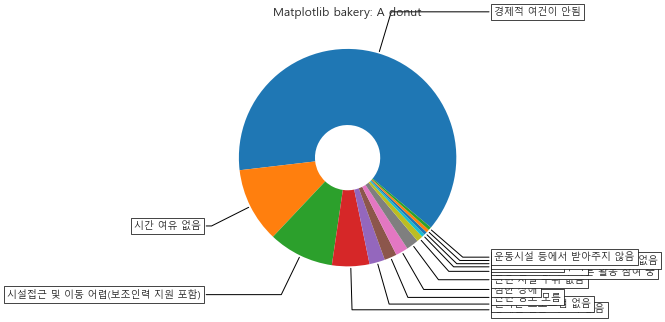

In [38]:
fig, ax = plt.subplots(figsize=(7, 5), subplot_kw=dict(aspect="equal"))

data = no_move1.iloc[:, 1].tolist()
recipe = no_move1.iloc[:, 0].tolist()

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.7), startangle=-40)

bbox_props = dict(boxstyle="square, pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(no_reason[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Matplotlib bakery: A donut")

plt.show()

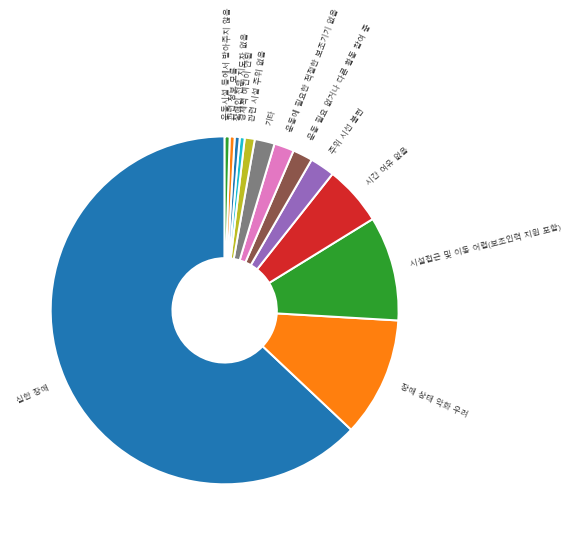

In [50]:
import math

data = no_move1.iloc[:, 1].tolist()
recipe = no_move1.iloc[:, 0].tolist()
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}
palette = sns.color_palette("Blues", n_colors=13) 
palette.reverse() # 색상 진한 정도 거꾸로

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

l = plt.pie(data, startangle=90, wedgeprops=wedgeprops)

for label, t in zip(recipe, l[1]):
    x, y = t.get_position()
    angle = int(math.degrees(math.atan2(y, x)))
    ha = "left"

    if x<0:
        angle -= 180
        ha = "right"

    plt.annotate(label, xy=(x,y), rotation=angle, ha=ha, va="center", rotation_mode="anchor", size=8)

---
### 뇌손상

In [13]:
no_move2 = pd.DataFrame(df.loc[df['주된 진단명(1)'] == 3].loc[df['건강관리운동']==2][['운동하지 않는 주된 이유']].value_counts()).reset_index()
no_move2

,운동하지 않는 주된 이유,0
0,7,25
1,2,4
2,3,3
3,9,3
4,8,2
5,11,2
6,4,1
7,5,1
8,6,1
9,10,1


In [14]:
no_reason = ['경제적 여건이 안됨', '시간 여유 없음', '시설접근 및 이동 어렵(보조인력 지원 포함)', '장애인 전문 지도자 없음', '원하는 프로그램 없음',
            '관련 정보 모름', '심한 장애', '관련 시설 주위 없음', '운동 필요 없거나 다른 활동 참여 중', '장애 상태 악화 우려', '주위 시선 불편',
            '운동에 필요한 적절한 보조기기 없음', '운동시설 등에서 받아주지 않음', '기타']

for i in range(len(no_reason)):
    no_move2.replace({'운동하지 않는 주된 이유': i+1}, {'운동하지 않는 주된 이유': no_reason[i]}, inplace=True)
no_move2

,운동하지 않는 주된 이유,0
0,심한 장애,25
1,시간 여유 없음,4
2,시설접근 및 이동 어렵(보조인력 지원 포함),3
3,운동 필요 없거나 다른 활동 참여 중,3
4,관련 시설 주위 없음,2
5,주위 시선 불편,2
6,장애인 전문 지도자 없음,1
7,원하는 프로그램 없음,1
8,관련 정보 모름,1
9,장애 상태 악화 우려,1


In [15]:
no_move2['pct'] = round(no_move2[0] / no_move2[0].sum() *100, 2)
no_move2

,운동하지 않는 주된 이유,0,pct
0,심한 장애,25,58.14
1,시간 여유 없음,4,9.30
2,시설접근 및 이동 어렵(보조인력 지원 포함),3,6.98
3,운동 필요 없거나 다른 활동 참여 중,3,6.98
4,관련 시설 주위 없음,2,4.65
5,주위 시선 불편,2,4.65
6,장애인 전문 지도자 없음,1,2.33
7,원하는 프로그램 없음,1,2.33
8,관련 정보 모름,1,2.33
9,장애 상태 악화 우려,1,2.33


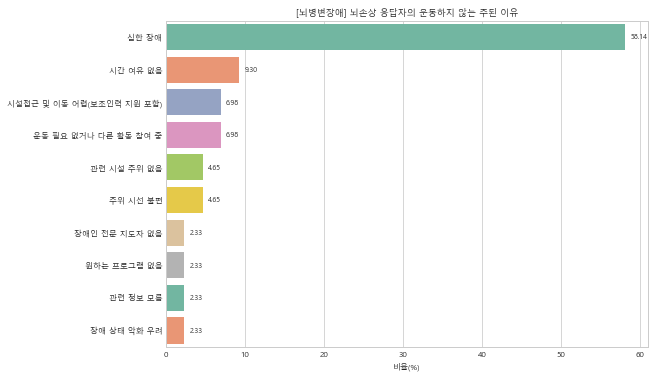

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

splot = sns.barplot(data = no_move2, y='운동하지 않는 주된 이유', x='pct', palette='Set2')

ax.set_title('[뇌병변장애] 뇌손상 응답자의 운동하지 않는 주된 이유', size = 9)
ax.set_xlabel('비율(%)', size = 8)
ax.set_ylabel('')
ax.tick_params(axis = 'both', labelsize =8, labelrotation = 0)

### 비율(%) 라벨링 하기
for p in splot.patches:
    ax.annotate("%.2f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", size = 7)

plt.gcf().subplots_adjust(left=0.23)
# plt.savefig("pyvisual/뇌병변장애/뇌손상/[뇌병변장애] 뇌손상 응답자의 운동하지 않는 주된 이유(pct).png", dpi=300)
plt.show()

---
## 운동하지 않는 이유 추가 탐색

### 이유: 심한 장애

#### **뇌졸중**

In [23]:
# 뇌졸중 中 '심한 장애' 응답자의 장애정도 확인
df.loc[df['주된 진단명(1)'] == 2].loc[df['건강관리운동']==2].loc[df['운동하지 않는 주된 이유']==7][['장애등급']].value_counts()

장애등급
2       38
1       37
3       36
4        8
5        6
6        6
0        5
dtype: int64

#### **뇌손상**

In [27]:
# 뇌손상 中 '심한 장애' 응답자의 장애정도 확인
df.loc[df['주된 진단명(1)'] == 3].loc[df['건강관리운동']==2].loc[df['운동하지 않는 주된 이유']==7][['장애등급']].value_counts()

장애등급
1       15
3        7
2        2
5        1
dtype: int64